In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [124]:
def euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        ui = f(u_prev) * t_delta + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, u[:-1]

In [125]:
def part2_problem1a(dt=1):
    x_start, x_end = (0, 4)
    a = 1
    
    x_euler, y_euler = euler(a, x_start, x_end, lambda u: u, dt)
    x_actual = np.linspace(x_start, x_end, 100)
    y_actual = np.exp(x_actual)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_euler, y_euler)
    ax.plot(x_actual, y_actual)

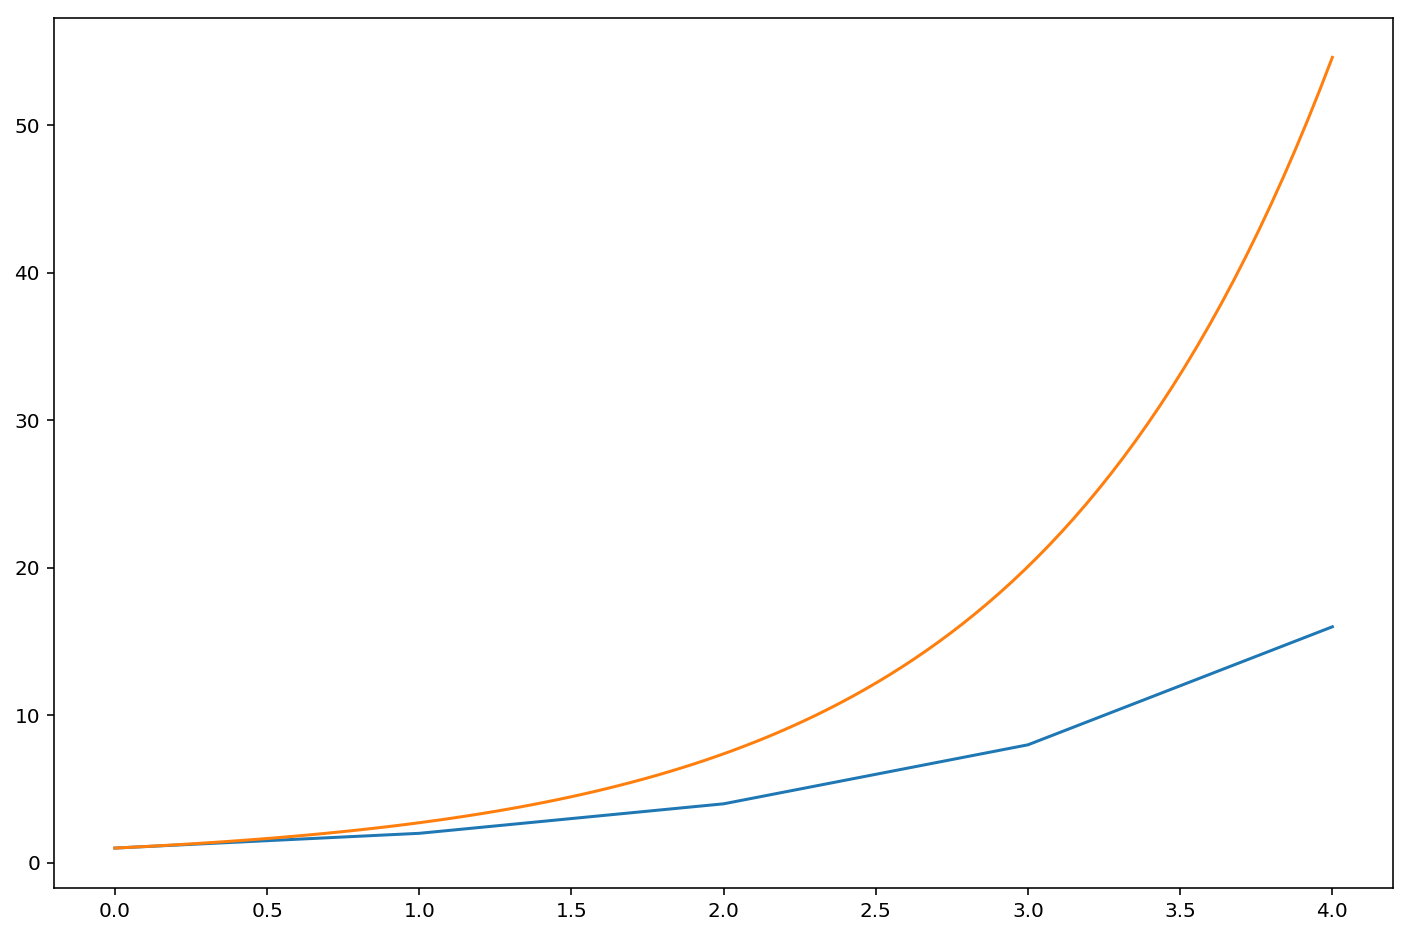

In [126]:
part2_problem1a()

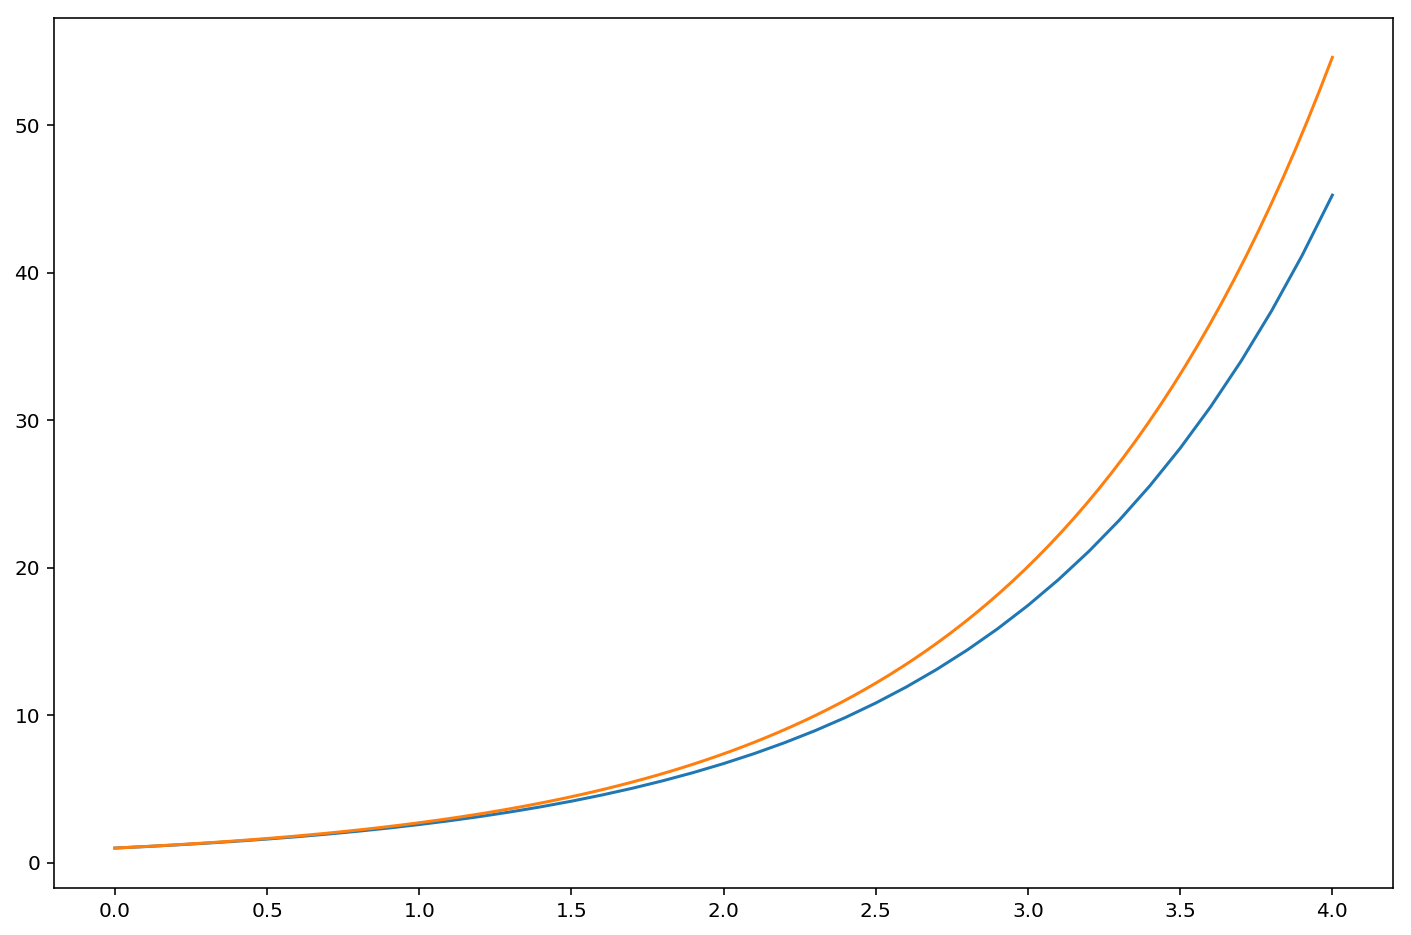

In [127]:
part2_problem1a(1/10)

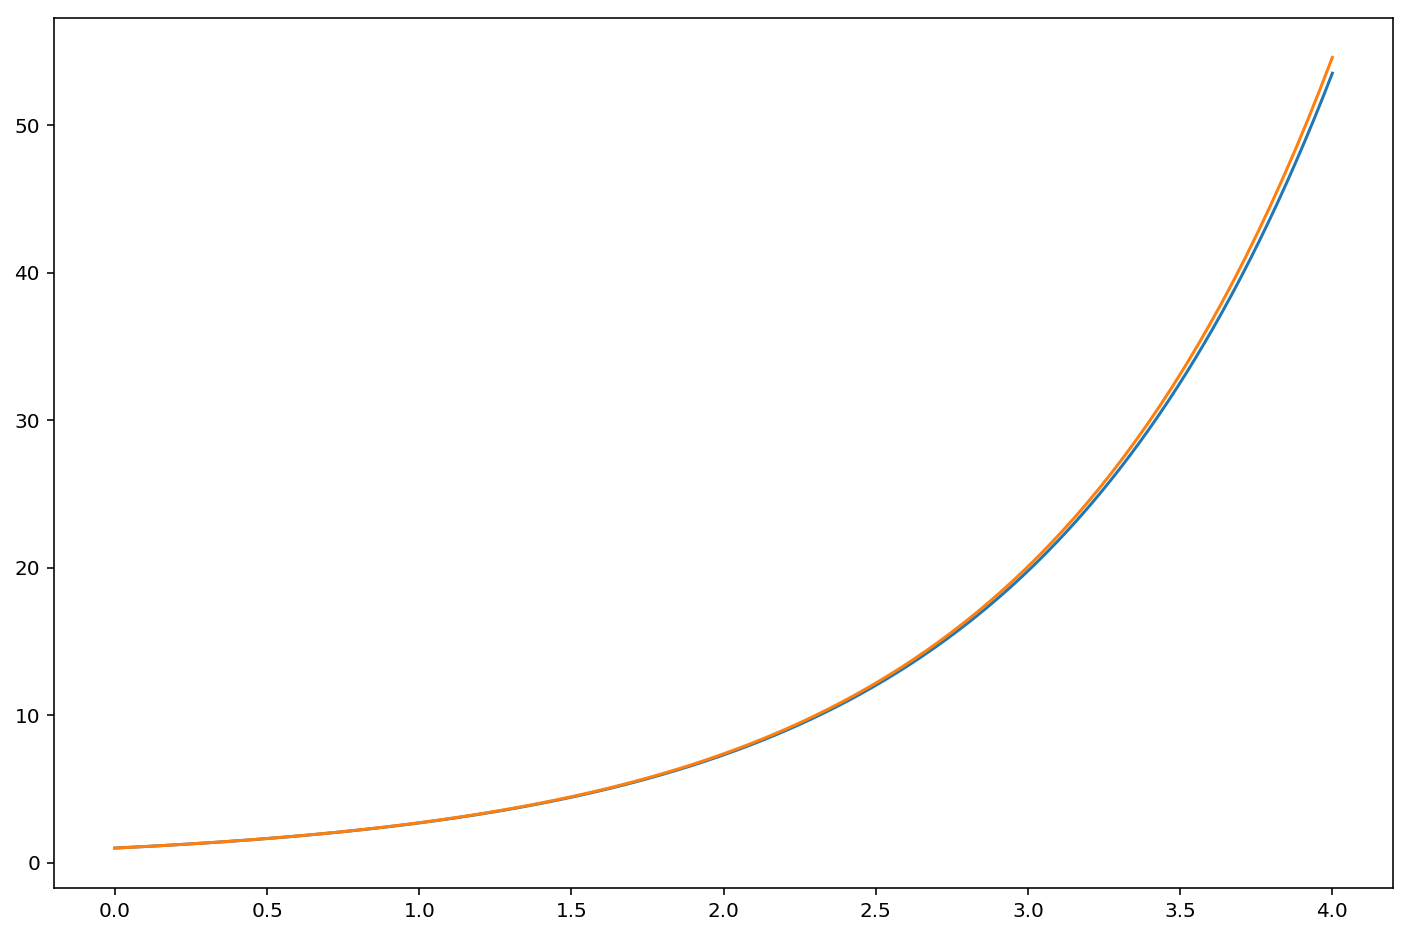

In [128]:
part2_problem1a(1/100)

In [129]:
def modified_euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        u_next_euler = (f(u_prev) * t_delta) + u_prev
        avg_slope = (f(u_next_euler) + f(u_prev)) / 2
        ui = (avg_slope * t_delta) + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, u[:-1]

In [132]:
def part2_problem1b(dt=1):
    x_start, x_end = (0, 4)
    a = 1
    
    x_euler, y_euler = modified_euler(a, x_start, x_end, lambda u: u, dt)
    x_actual = np.linspace(x_start, x_end, 100)
    y_actual = np.exp(x_actual)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_euler, y_euler)
    ax.plot(x_actual, y_actual)

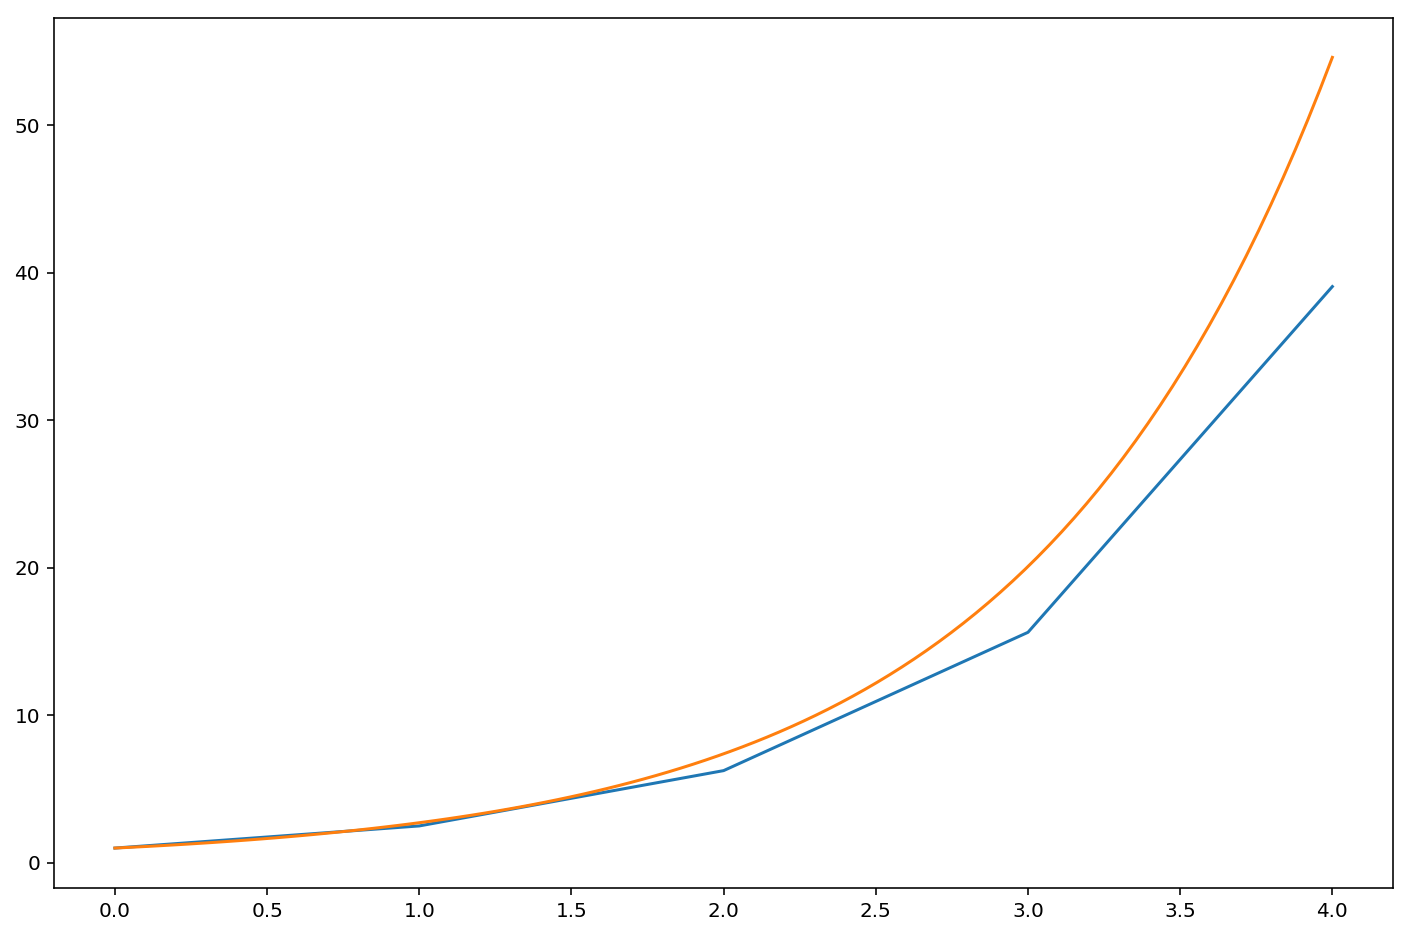

In [133]:
part2_problem1b(1)

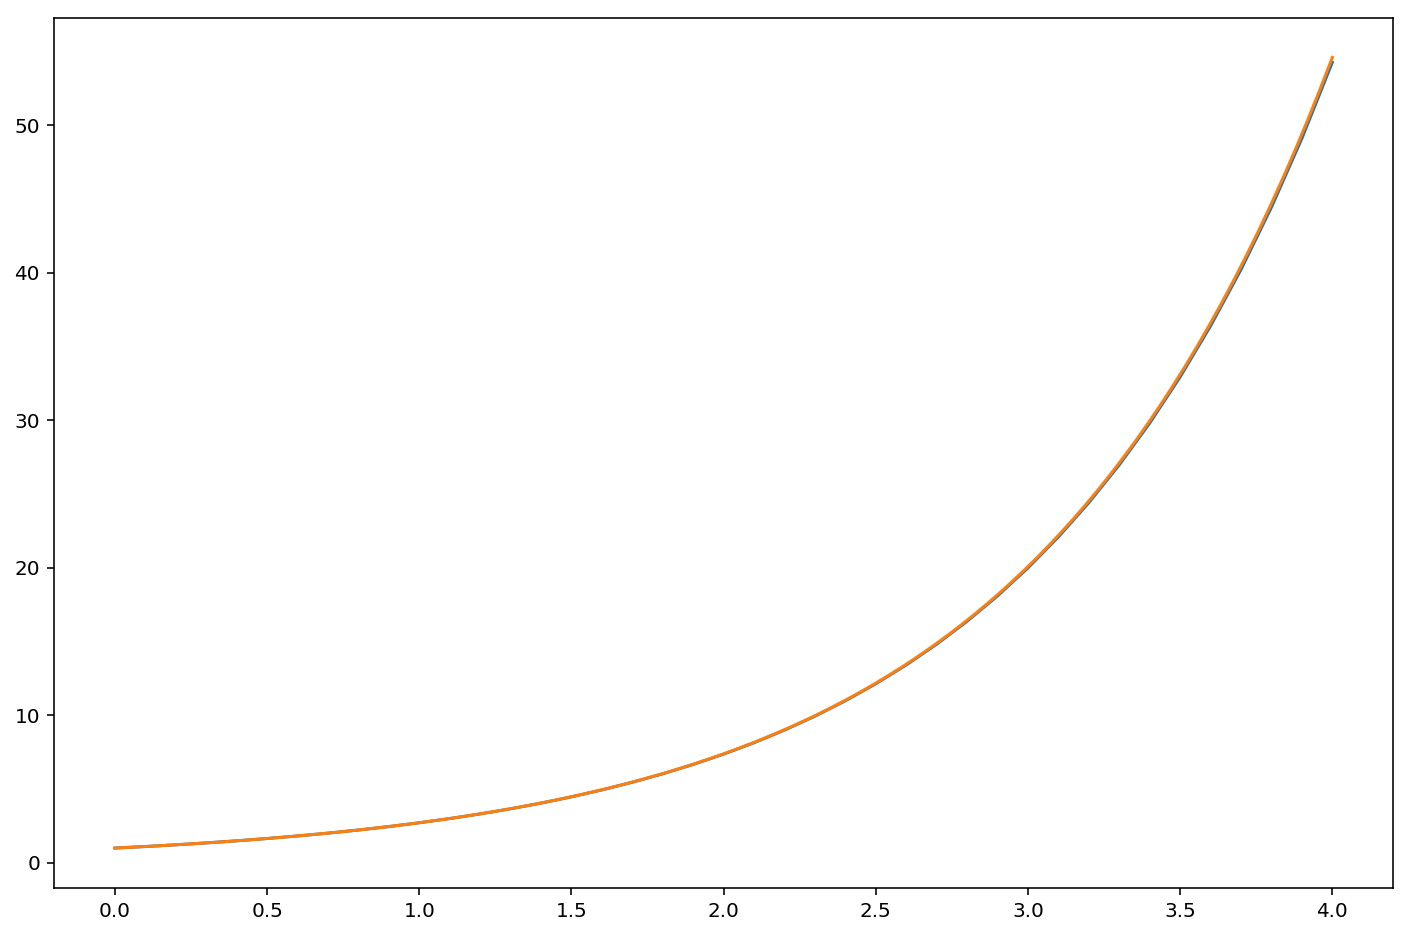

In [134]:
part2_problem1b(1/10)

In [168]:
def solve_taylor(u_start, t_start, t_end, f, f_deriv, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    
    ODE is basically using y value to get derivative
    """
    u_prev = u_start
    u = [u_prev]
    
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        taylor_1st = (t_delta * f(u_prev))
        taylor_2nd = (((t_delta ** 2) / 2) * f_deriv(u_prev) * f(u_prev))
        ui = u_prev + taylor_1st + taylor_2nd
        u_prev = ui
        
        u.append(ui)
        
    return steps, u[:-1]

In [169]:
def part2_problem2(dt=2):
    x_start, x_end = (0, 4)
    a = 1
    
    x_approx, y_approx = solve_taylor(a, x_start, x_end, 
                                      lambda u: 2 * np.sin(u),
                                      lambda u: 4 * np.cos(u) * np.sin(u),
                                      dt)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_approx, y_approx)

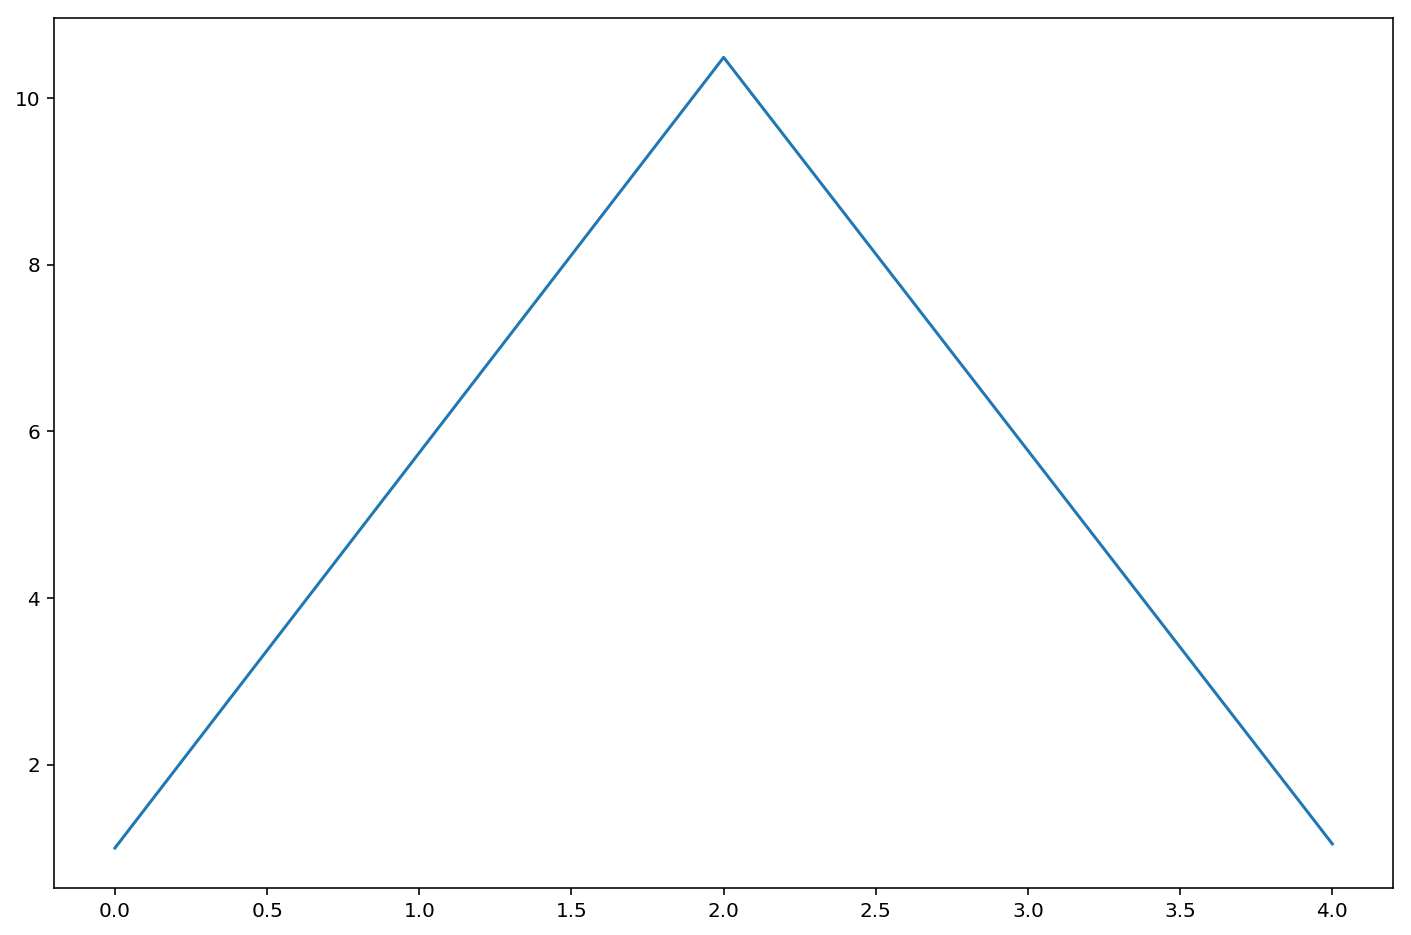

In [171]:
part2_problem2()

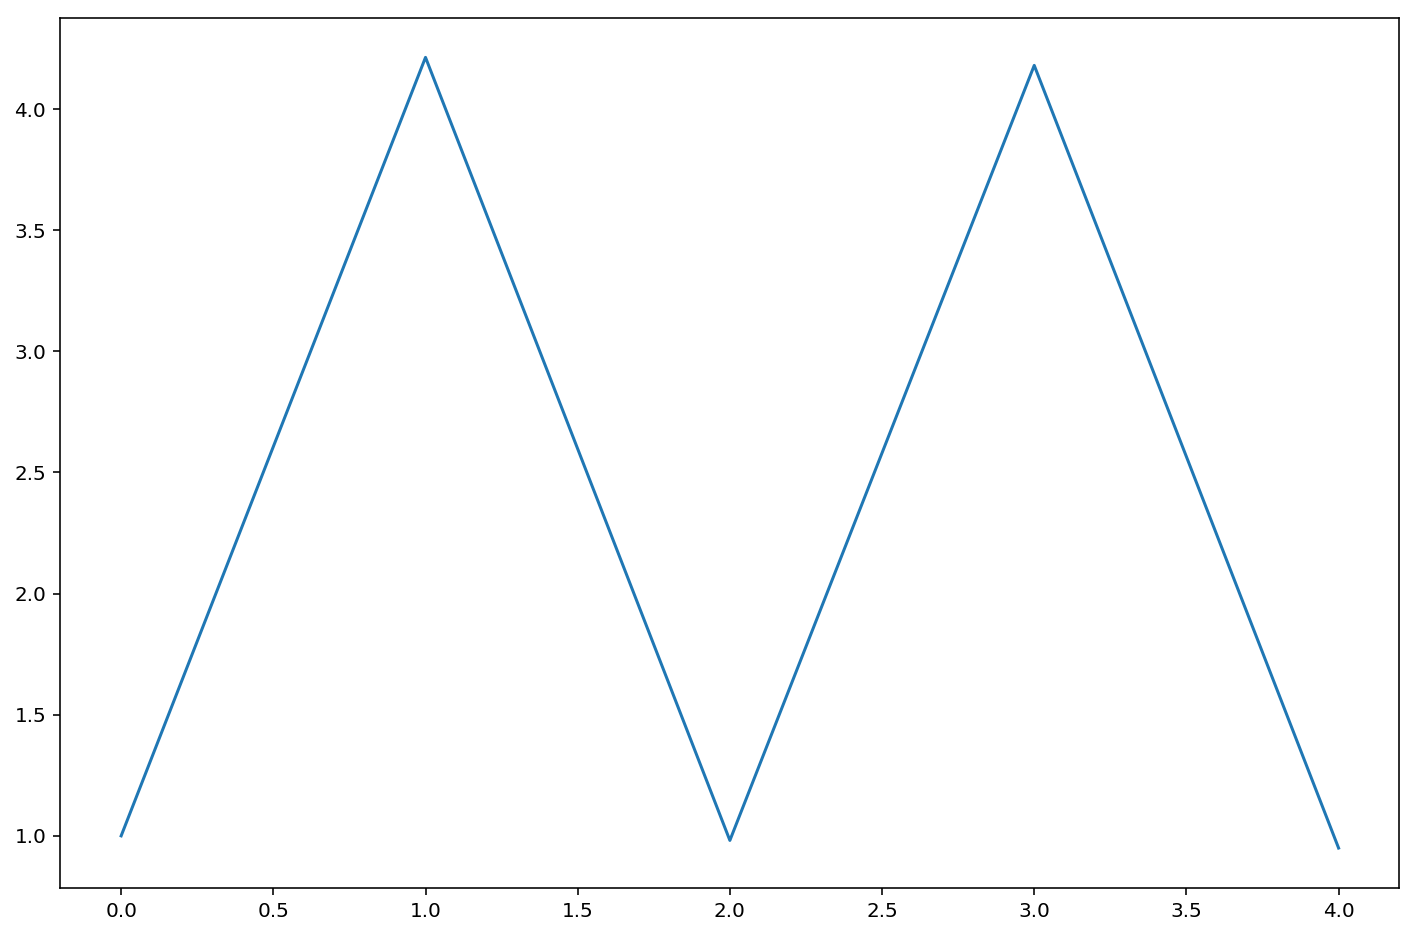

In [172]:
part2_problem2(1)

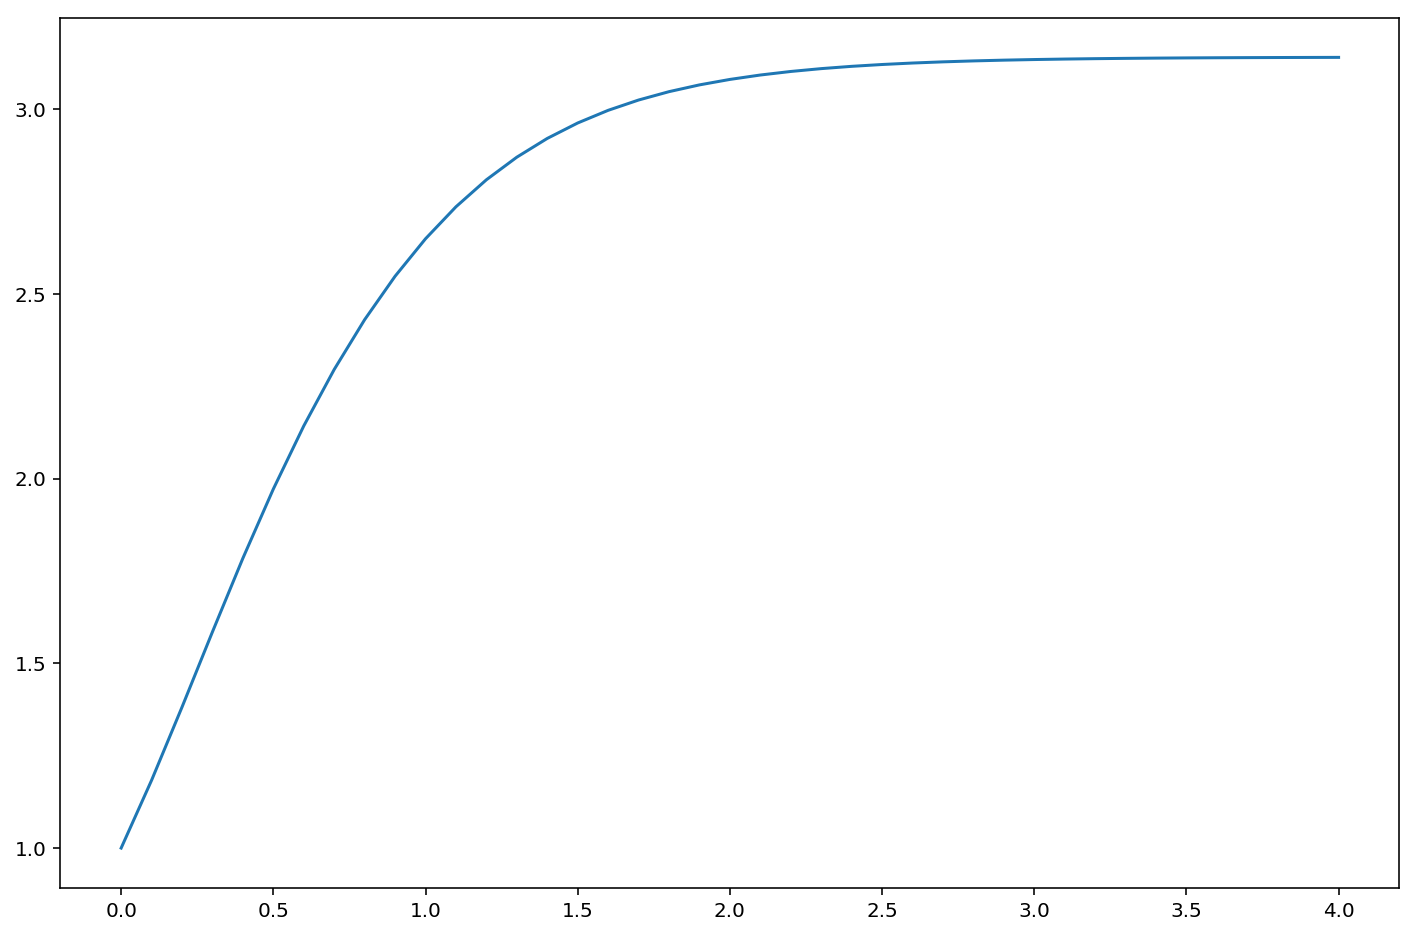

In [173]:
part2_problem2(0.1)

In [207]:
def part2_problem3():
    x_start, x_end = (0, 80)
    a1 = np.array([0.01, 0.01])
    a2 = np.array([2, 2])
    
    x_approx, uv_approx1 = modified_euler(a1, x_start, x_end, 
                                         lambda u: np.array((u[1] - u[0]**3, -u[0] + (u[1]/2))),
                                         0.1)
    x_approx, uv_approx2 = modified_euler(a2, x_start, x_end,
                                     lambda u: np.array((u[1] - u[0]**3, -u[0] + (u[1]/2))),
                                     0.1)
    
    u_approx1 = np.array(uv_approx1)[:,0]
    v_approx1 = np.array(uv_approx1)[:,1]
    
    u_approx2 = np.array(uv_approx2)[:,0]
    v_approx2 = np.array(uv_approx2)[:,1]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(u_approx1, v_approx1)
    ax.plot(u_approx2, v_approx2)

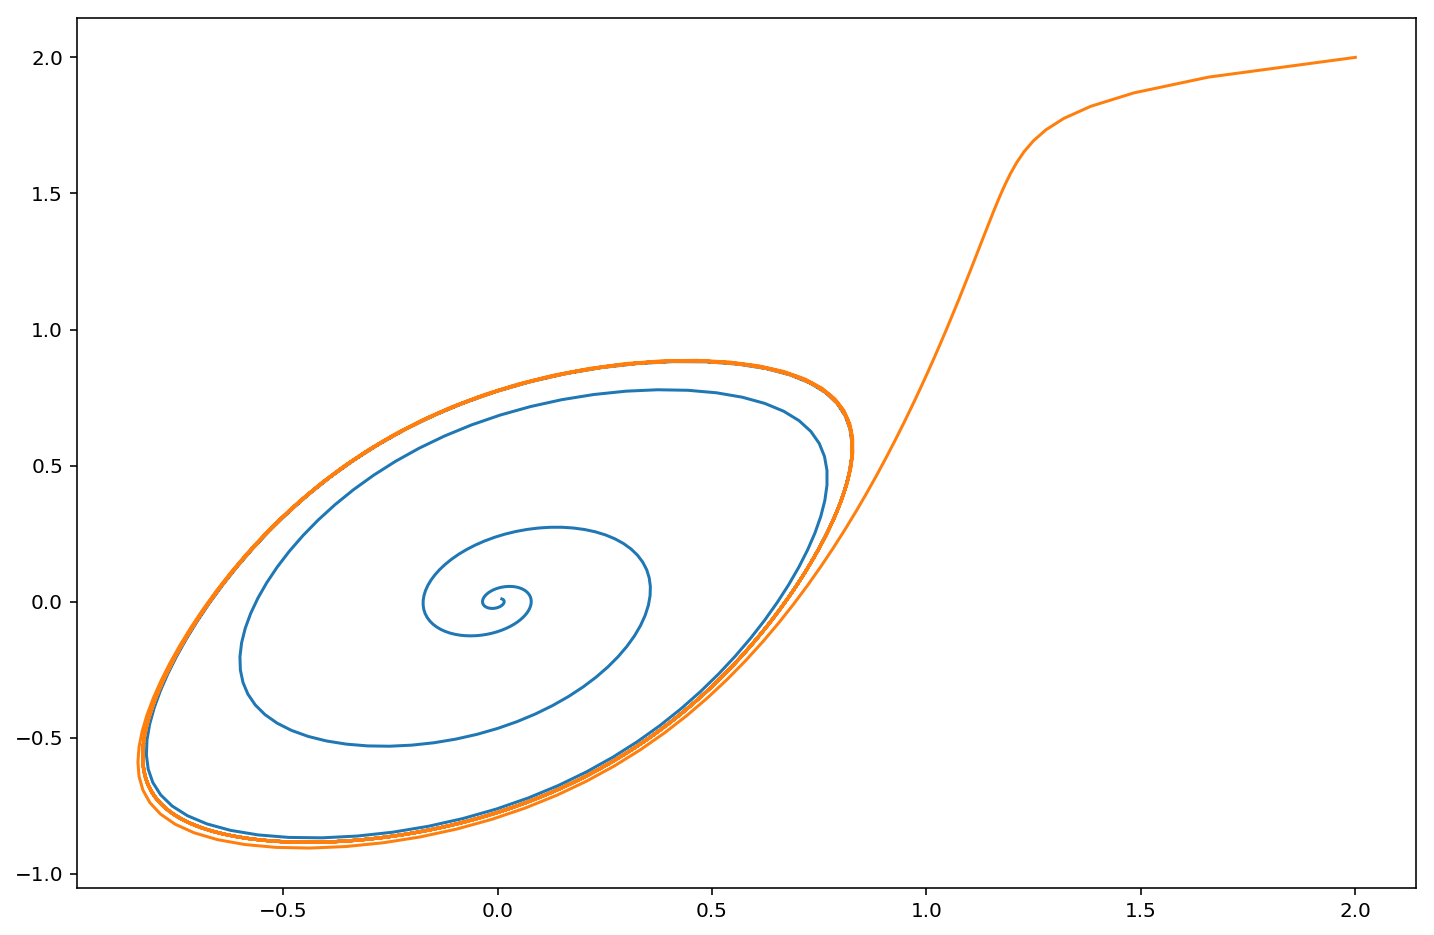

In [208]:
part2_problem3()

In [259]:
def part2_problem3c():
    x_start, x_end = (0, 10)
    
    for b in np.linspace(0.774, 0.78, 10**4):
        initial = np.array([0, b])
    
        x_approx, uv_approx = modified_euler(initial, x_start, x_end, 
                                             lambda u: np.array((u[1] - u[0]**3, -u[0] + (u[1]/2))),
                                             0.1)
        v_approx = np.array(uv_approx)[:,1][1:]
        
        # might not work because u != 0, and steps might be too big
        # just zoom into graph to get number instead
        for v in v_approx:
            if np.isclose(b, v):
                return b

In [260]:
print(part2_problem3c())

0.7740750075007501


In [236]:
def part2_problem3c_plot(b):
    x_start, x_end = (0, 80)
    x_approx, uv_approx = modified_euler(np.array((0, b)), x_start, x_end, 
                                         lambda u: np.array((u[1] - u[0]**3, -u[0] + (u[1]/2))),
                                         0.1)
    
    u_approx = np.array(uv_approx)[:,0]
    v_approx = np.array(uv_approx)[:,1]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(u_approx, v_approx)

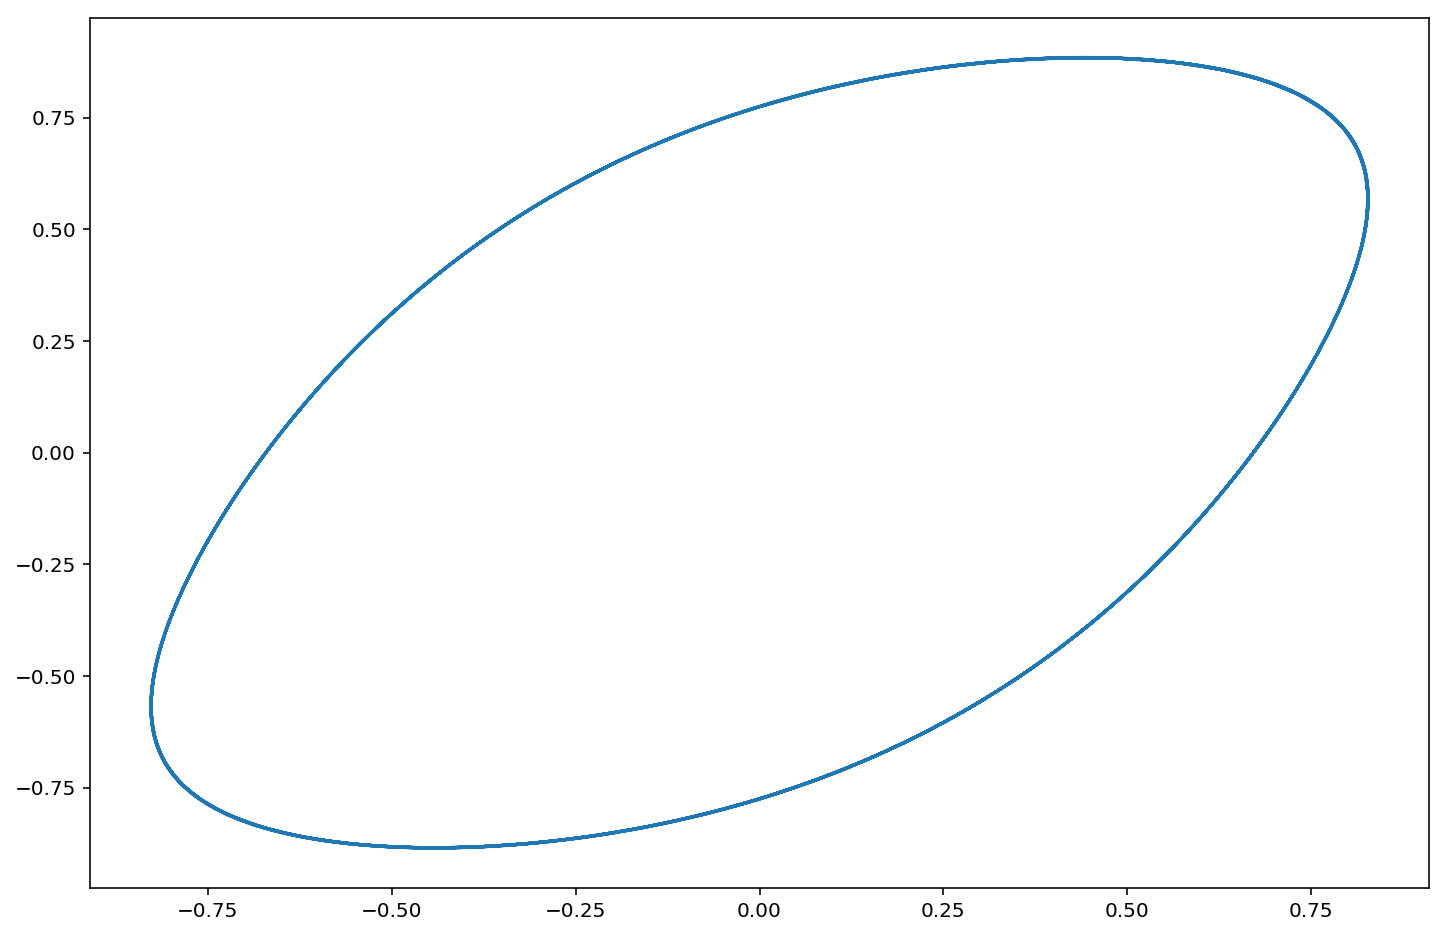

In [258]:
part2_problem3c_plot(0.7745)

In [263]:
print("b: " + str(0.7745))

b: 0.7745


In [326]:
def part2_problem4():
    # v = (theta, u) = (theta, theta')
    x_start, x_end = (0, 20)
    a = (0, 1.99)
    
    x_approx, v_approx = modified_euler(a, x_start, x_end, 
                                        lambda v: np.array((v[1], -np.sin(v[0]))),
                                        0.0001)
    
    theta_approx = np.array(v_approx)[:,0]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x_approx, theta_approx)
    
    first_peak = theta_approx[:len(theta_approx) // 2].argmax()
    second_peak = theta_approx[len(theta_approx) // 2:].argmax() + (len(theta_approx) // 2)
    
    peak = theta_approx.argmax()
    dip = theta_approx.argmin()
    
    print((x_approx[peak] - x_approx[dip]) * 2)
    print(x_approx[second_peak] - x_approx[first_peak])
    
    ax.plot(x_approx[dip], theta_approx[dip], 'o')
    ax.plot(x_approx[first_peak], theta_approx[first_peak], 'o')
    ax.plot(x_approx[second_peak], theta_approx[second_peak], 'o')

14.787600000000001
14.787500000000001


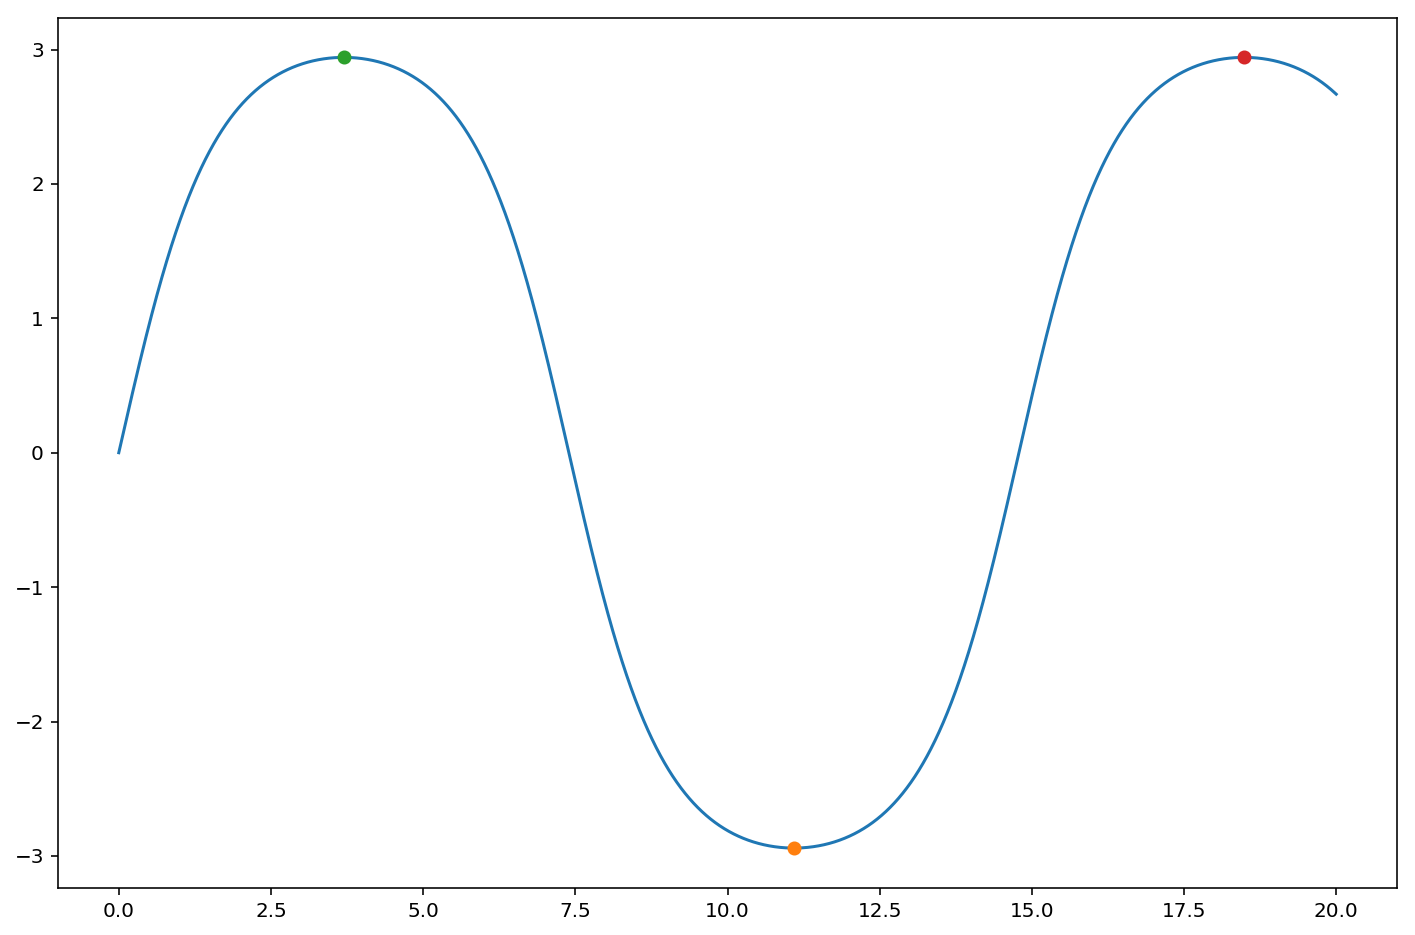

In [327]:
part2_problem4()